# Fully-connected Neural Networks - Human Activity Recognition
Neil John Catapang

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from time import time

In [2]:
# Load the subject data
subject_train = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None, names=['Subject'])
subject_test = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None, names=['Subject'])

subject_train.head()

,Subject
0,1
1,1
2,1
3,1
4,1


In [3]:
# Load the train and test data
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, 
                      sep=r'\s+')
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header=None, 
                      sep=r'\s+')
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, 
                      sep=r'\s+', names=['Activity'])
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, 
                      sep=r'\s+', names=['Activity'])

# Get feature names
columns = pd.read_csv('UCI HAR Dataset/features.txt', header=None, 
                      sep=r'\s+')
columns_list = columns[1].to_list()
X_train.columns = columns_list
X_test.columns = columns_list

display(y_train[0:5])
X_train.head()


,Activity
0,5
1,5
2,5
3,5
4,5


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


## Exploratory Data Analysis

### Check for Columns with Null Counts

In [4]:
nulls = X_train.isnull().sum()
print(nulls[nulls > 0])
print(X_train.isnull().sum().sum(), '\n')
X_train.info()

Series([], dtype: int64)
0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [5]:
nulls = X_test.isnull().sum()
print(nulls[nulls > 0])
print(X_test.isnull().sum().sum(), '\n')
X_test.info()

Series([], dtype: int64)
0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.6 MB


No columns with null counts are detected.

### Value Counts of Subject and Activity

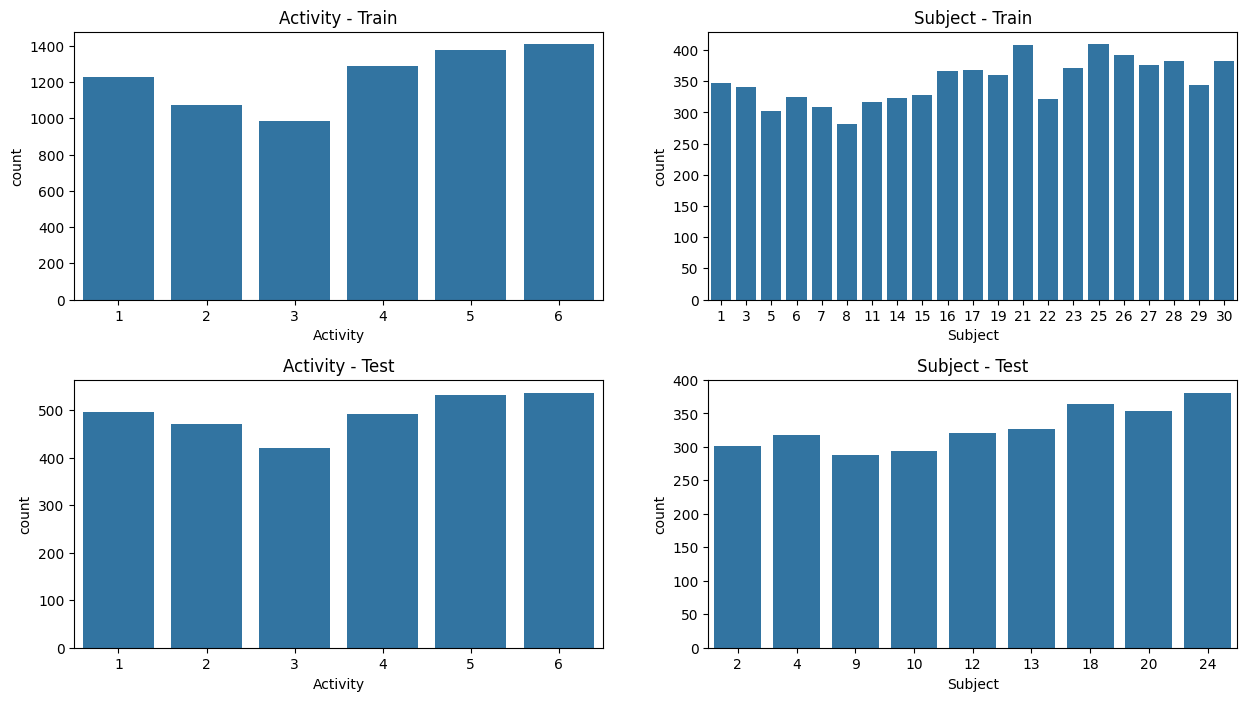

In [6]:
plt.figure(figsize=(15, 8))

# Train Data - Activity
plt.subplot(221)
sns.countplot(data=y_train, x='Activity')
plt.title("Activity - Train")

# Train Data - Subjects
plt.subplot(222)
sns.countplot(data=subject_train, x='Subject')
plt.title("Subject - Train")

# Test Data - Activity
plt.subplot(223)
sns.countplot(data=y_test, x='Activity')
plt.title("Activity - Test")

# Test Data - Subjects
plt.subplot(224)
sns.countplot(data=subject_test, x='Subject')
plt.title("Subject - Test")

plt.subplots_adjust(hspace=0.3)
plt.show()

The classes are quite well-balanced to some degree. The train and test subjects are also balanced. Class balancing may not be required for this dataset.

### Correlation Heatmap for Means of Features

Number of Features with Mean: 53


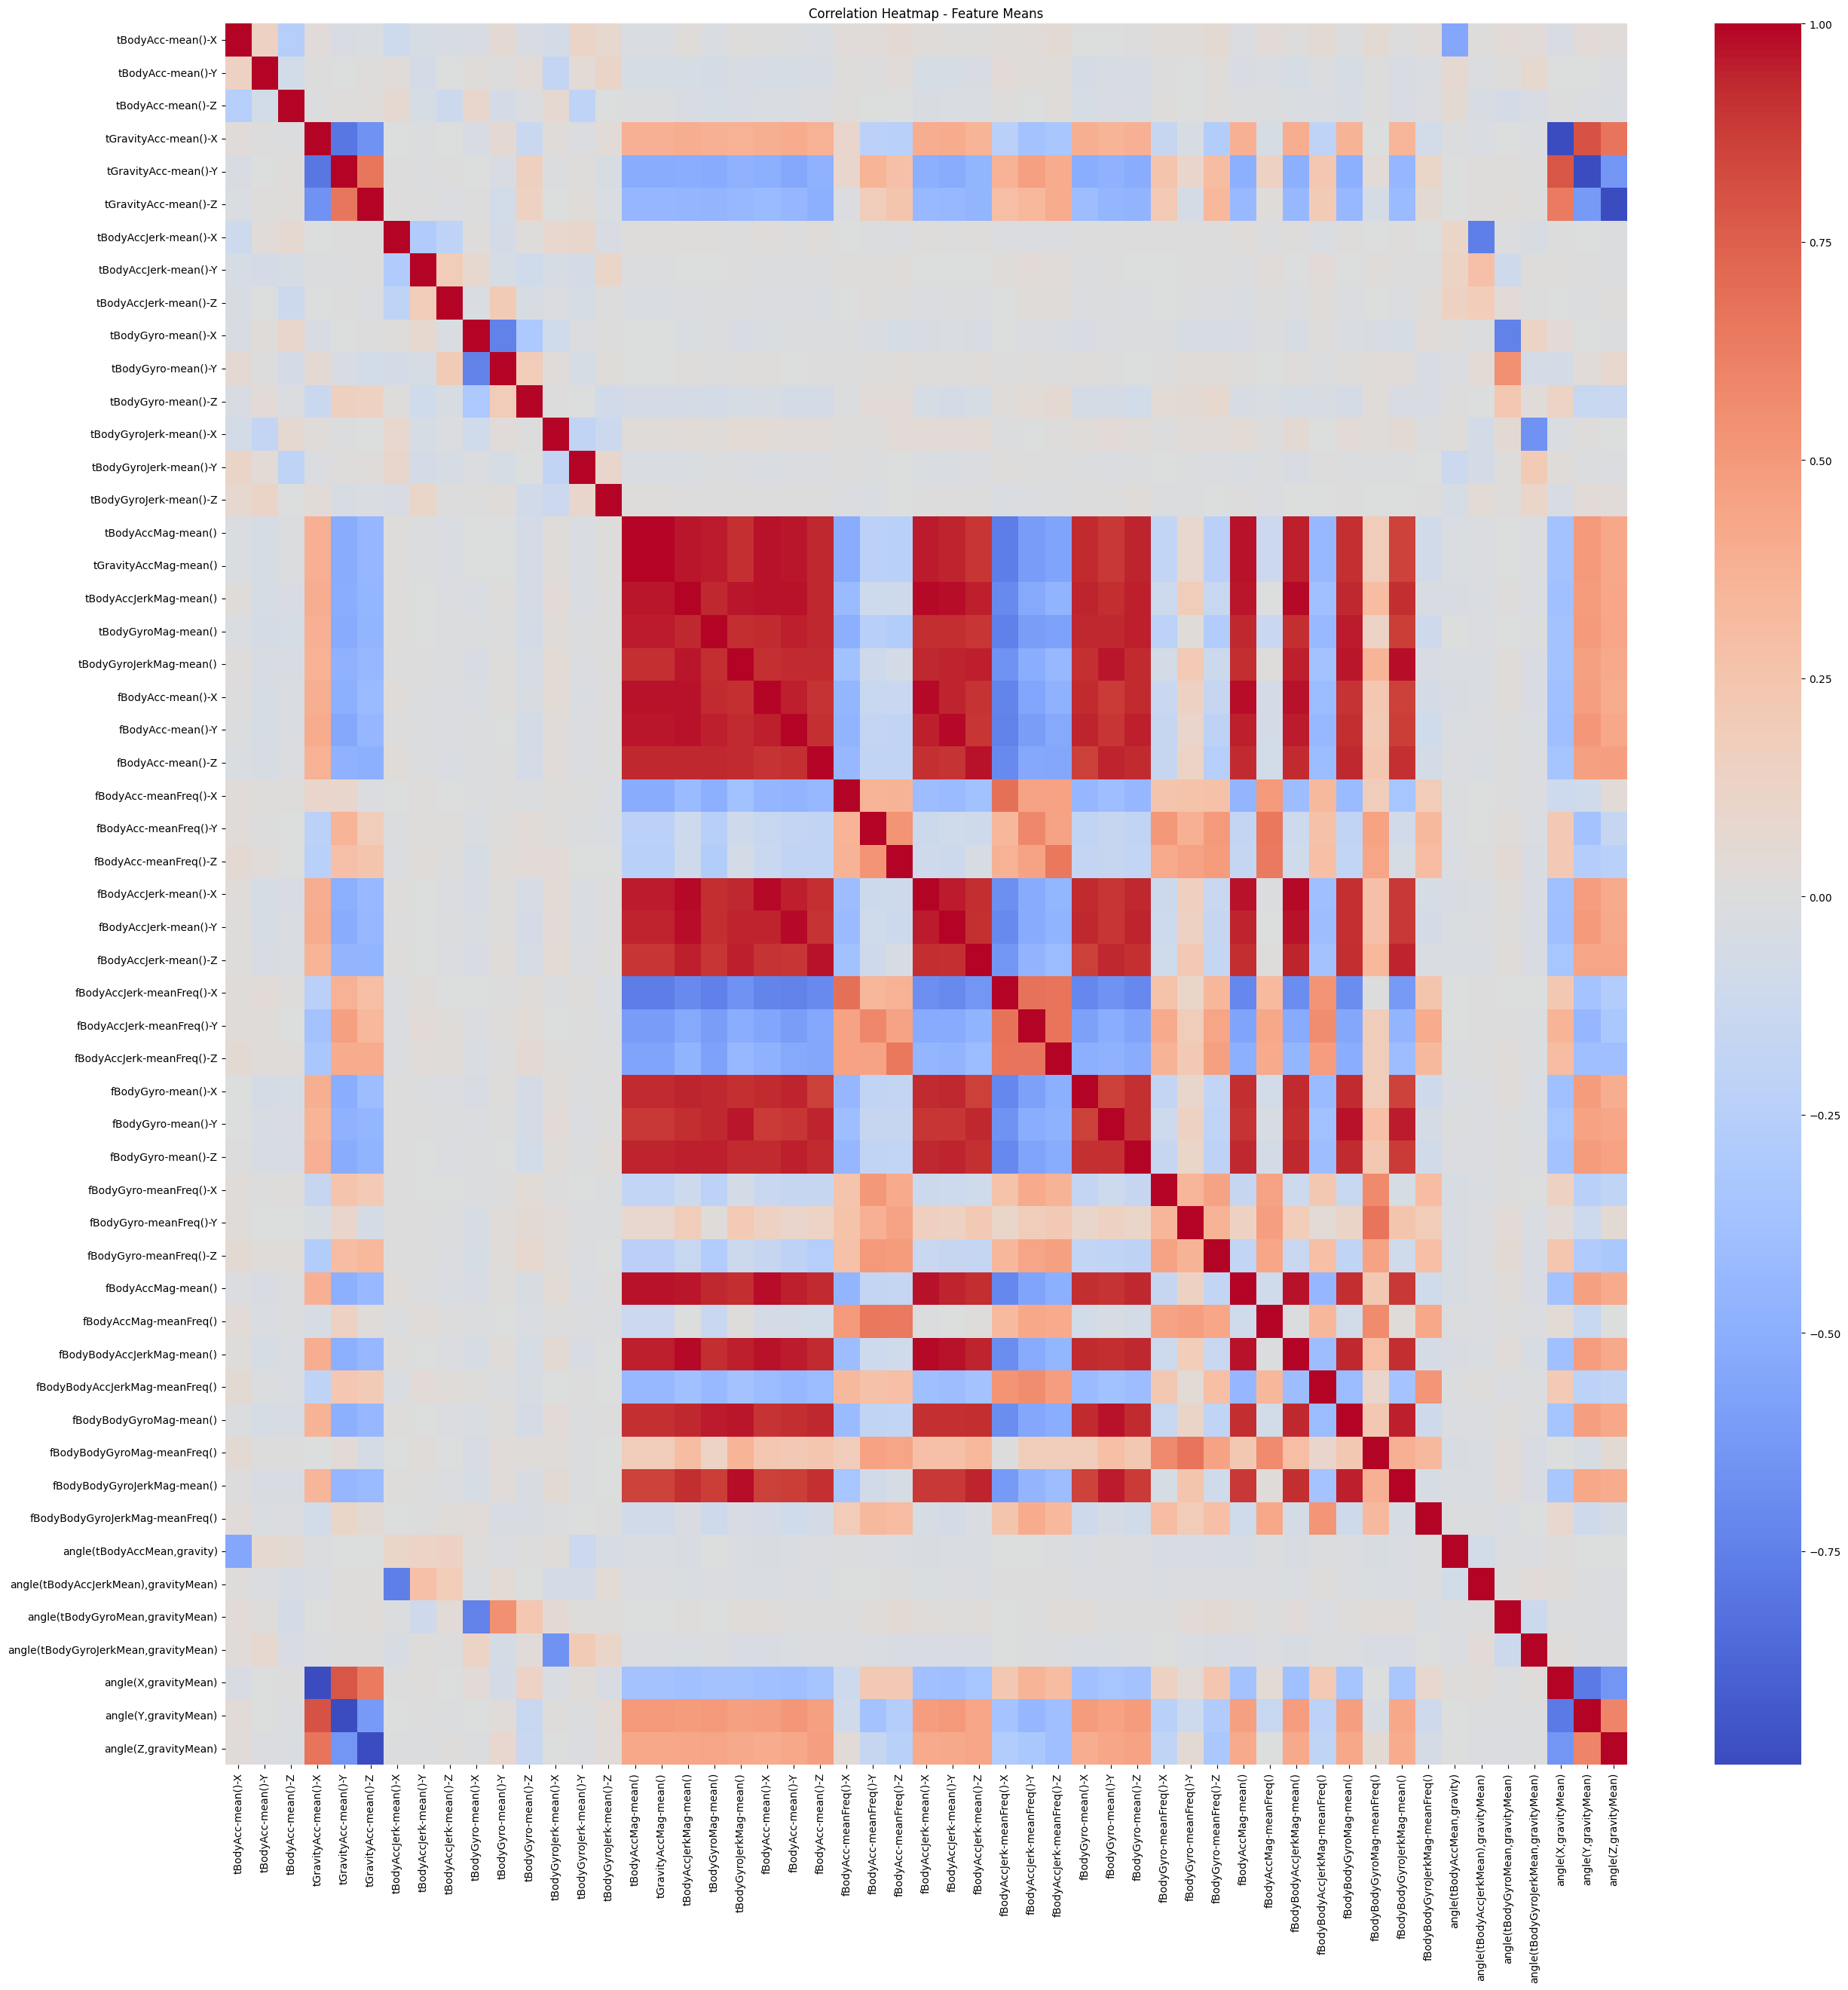

In [7]:
# Get the values of means of features
feature_means = [s for s in columns_list if 'mean' in s.lower()]
corr_subset = X_train[feature_means].corr()
print(f'Number of Features with Mean: {len(feature_means)}')

# Heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr_subset, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap - Feature Means")
plt.show()

We can see that some of the features are highly correlated with each other. However, we want to keep all the features in this dataset since fully-connected neural networks are non-linear models which can handle highly-correlated features well.

## Fully-connected Neural Network

In [8]:
# Scale the data before training model (no balancing)
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=200, random_state=42, solver='adam'))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(128,), (256,), (256, 128)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

kfoldcv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid1 = GridSearchCV(pipeline1, param_grid, scoring='accuracy', cv=kfoldcv, verbose=3, n_jobs=-1)

start1 = time() 
grid1.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds." % (time() - start1))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\Neil Catapang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV took 1391.27 seconds.


In [9]:
best_model_1 = grid1.best_estimator_
print("Neural Network")
print("Best Parameters:", grid1.best_params_)
print("Best Accuracy:", grid1.best_score_)

Neural Network
Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (256,), 'mlp__learning_rate': 'constant'}
Best Accuracy: 0.9873493435443518


In [10]:
# ANN-GridSearch - Accuracy and Confusion Matrix
print('Neural Network')
print(f"Accuracy = {best_model_1.score(X_test, y_test)}")
print('Confusion Matrix')
y_test_pred1 = best_model_1.predict(X_test)
print(confusion_matrix(y_test, y_test_pred1))

# ANN-GridSearch - Classification Report
print(classification_report(y_test, y_test_pred1))

Neural Network
Accuracy = 0.9446895147607737
Confusion Matrix
[[493   0   3   0   0   0]
 [ 20 450   1   0   0   0]
 [  6  30 384   0   0   0]
 [  0   2   0 421  67   1]
 [  0   0   0  14 518   0]
 [  0   0   0   0  19 518]]
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.93      0.96      0.94       471
           3       0.99      0.91      0.95       420
           4       0.97      0.86      0.91       491
           5       0.86      0.97      0.91       532
           6       1.00      0.96      0.98       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



## Fully-connected Neural Network and Balanced Dataset

In [11]:
# Balance the dataset
oversample = SMOTE(random_state=42)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [12]:
# Scale the data before training model (no balancing)
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=200, random_state=42, solver='adam'))
])

grid2 = GridSearchCV(pipeline2, param_grid, scoring='accuracy', cv=kfoldcv, verbose=3, n_jobs=-1)

start2 = time() 
grid2.fit(X_train_over, y_train_over)
print("GridSearchCV took %.2f seconds." % (time() - start2))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\Neil Catapang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV took 1479.63 seconds.


In [13]:
best_model_2 = grid2.best_estimator_
print("Neural Network + SMOTE")
print("Best Parameters:", grid2.best_params_)
print("Best Accuracy:", grid2.best_score_)

Neural Network + SMOTE
Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (256,), 'mlp__learning_rate': 'constant'}
Best Accuracy: 0.9885097045561047


In [14]:
# ANN-SMOTE - Accuracy and Confusion Matrix
print('Neural Network + SMOTE')
print(f"Accuracy = {best_model_2.score(X_test, y_test)}")
print('Confusion Matrix')
y_test_pred2 = best_model_2.predict(X_test)
print(confusion_matrix(y_test, y_test_pred2))

# ANN-SMOTE - Classification Report
print(classification_report(y_test, y_test_pred2))

Neural Network + SMOTE
Accuracy = 0.9504580929759077
Confusion Matrix
[[486   2   8   0   0   0]
 [ 22 443   5   0   1   0]
 [  5   7 408   0   0   0]
 [  0   1   0 436  53   1]
 [  1   0   0  22 509   0]
 [  0   0   0   0  18 519]]
              precision    recall  f1-score   support

           1       0.95      0.98      0.96       496
           2       0.98      0.94      0.96       471
           3       0.97      0.97      0.97       420
           4       0.95      0.89      0.92       491
           5       0.88      0.96      0.91       532
           6       1.00      0.97      0.98       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

